In [155]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [156]:
# a) 
N = 1000
f1 = 11
f2 = 5
time = np.linspace(0,1,N)
trend = 20*time*time + 5*time + 10
sezon = np.sin(2*np.pi*f1*time) + np.sin(2*np.pi*f2*time)
variatii_mici = np.random.normal(size = N)


serie = trend+sezon+variatii_mici

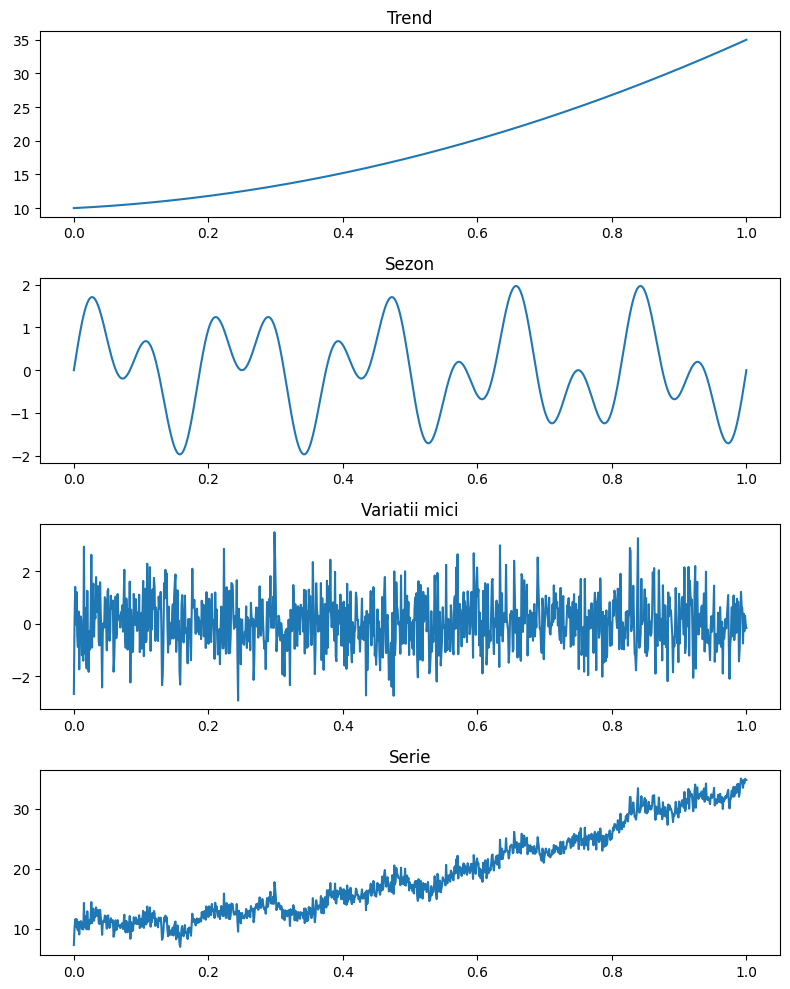

In [157]:
fig, axes = plt.subplots(4, 1, figsize=(8, 10))
axes[0].plot(time,trend)
axes[0].set_title("Trend")
axes[1].plot(time,sezon)
axes[1].set_title("Sezon")
axes[2].plot(time,variatii_mici)
axes[2].set_title("Variatii mici")
axes[3].plot(time,serie)
axes[3].set_title("Serie")
plt.tight_layout()
plt.savefig("grafice/ex1a.pdf", format="pdf")
plt.savefig("grafice/ex1a.png", format="png")

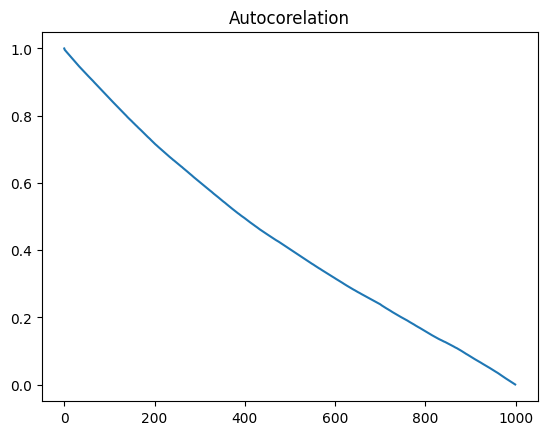

In [158]:
# b)
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]/result.max()

autocorelation = autocorr(serie)

plt.plot(autocorelation)
plt.title("Autocorelation")
plt.savefig("grafice/ex1b.pdf", format="pdf")
plt.savefig("grafice/ex1b.png", format="png")

In [159]:
# c)
def train_model_AR(date_trecut,dimensiune_ar):
   
    p = dimensiune_ar
    Y = np.zeros((len(date_trecut) - p, p))
    for lin in range(len(date_trecut) - p):
        for col in range(p):
            Y[lin][col] =  date_trecut[p+lin-col-1]
    y = (date_trecut[p:]).T
    # print(y)
    # print(Y)
    
    coef = np.matmul(np.matmul(np.linalg.pinv(np.matmul(Y.T,Y)), Y.T),y)
    return coef
    
def predict_ar(coef,date_trecut,p):
    ultimele_p_val =  np.flip(date_trecut[-p:])
    predictie = np.sum(coef * ultimele_p_val)
    return predictie    
        

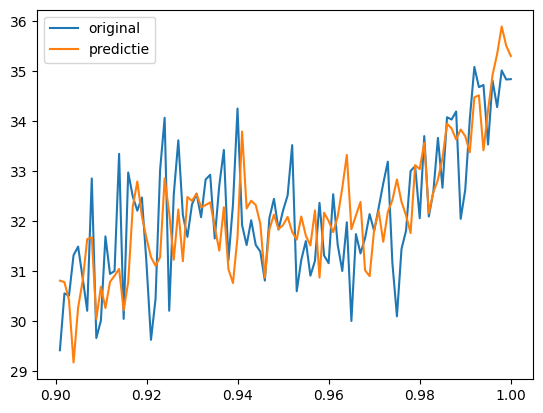

In [160]:
# c) 
p = 250  # dimensiunea modelului AR
m = int(0.9*len(serie))
train_date_trecut = serie[:m]


coeficienti = train_model_AR(train_date_trecut,p)
predictii = []
for i in range(len(serie) - m):
    pred = predict_ar(coeficienti,train_date_trecut,p)
    predictii.append(pred)
    train_date_trecut = np.append(train_date_trecut,pred)

plt.plot(time[m:],serie[m:],label ="original")
plt.plot(time[m:],predictii,label="predictie")
plt.legend()
plt.savefig("grafice/ex1c.pdf", format="pdf")
plt.savefig("grafice/ex1c.png", format="png")


In [161]:
# d)
def testmp(serie,m,p):
    eroare = 0
    n = 0
    for i in range(0,len(serie)-m-1,m):
        train = serie[i:i+m]
        test = serie[i+m]
        coef = train_model_AR(train,p)
        pred = predict_ar(coef, train, p)
        eroare += abs(test - pred) 
        n += 1
    MAE = eroare/n
    return(MAE)

In [162]:
# d)

m = [200, 400, 700, 800, 900]
p = [50 , 100 , 300, 500, 700]
best_error = []
for i in m:
    for j in p:
        if i >= j:
            eroare = testmp(serie,i,j)
            best_error.append((eroare,i,j)) 
            
best_error = sorted(best_error, key=lambda x : x[0])
print(f"m = {best_error[0][1]}, p = {best_error[0][2]}")     
# print(best_error) 

m = 700, p = 50
